In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [206]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24)) and Supernovae.SN !='2002bf'"]

In [207]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1
159 questionable files currently ignored
6 questionable spectra removed 202 spectra left
5 Peculiar Ias removed 197 spectra left
149 spectra with host corrections
159 questionable files currently ignored
102 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
1991bg sn1991bg-19911213-noz.flm 64.7109206589 None 1.88326464208 0.681687715271 0.003392 bsnip 3340.0 8602.0 3.0
Host correction...
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.728371655089 0.013219 bsnip 3308.0 10018.0 14.0
Host correction...
1998es sn1998es-19981125-ui-corrected.flm 69.1436677309 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.460351148368 0.014443 b

In [97]:
query_db.set_min_num_spec(composites, 5)

In [98]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [21]:
import pyphot

In [22]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [23]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [24]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [25]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [26]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

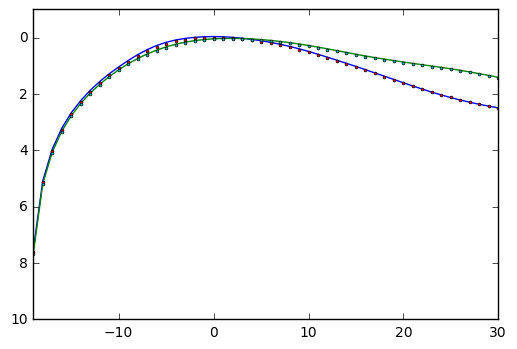

In [27]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

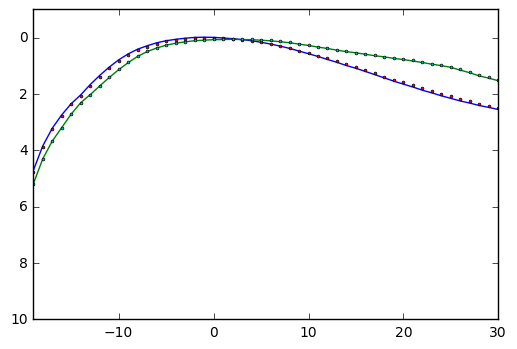

In [28]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

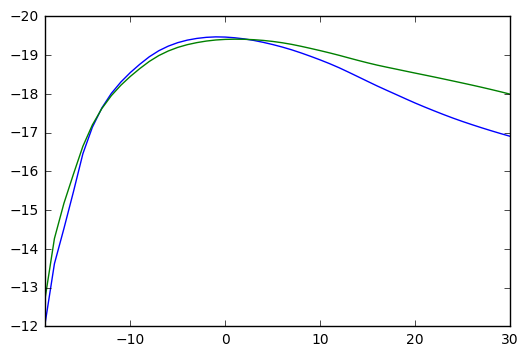

In [29]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

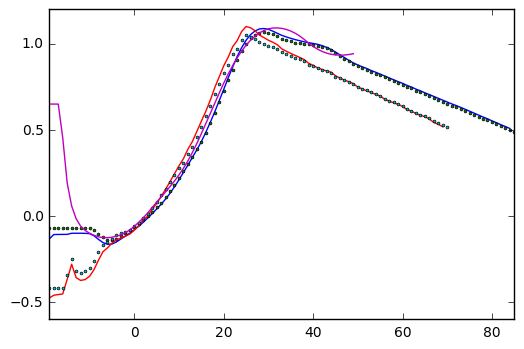

In [30]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [31]:
#changeable phase bin size
query_strings_all = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10."]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
    query_strings_all.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k

In [32]:
query_strings_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
    query_strings_dm15.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'"% (p1,p2))
    p1 += k
    p2 += k

In [33]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.
ERROR:  sn2006oa-20061116-not.dat None
159 questionable files currently ignored
2 questionable spectra removed 89 spectra left
0 Peculiar Ias removed 89 spectra left
76 spectra with host corrections
159 questionable files currently ignored
34 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
1994d sn1994D-19940310.36-mmt.flm 61.6257187727 1.37 None -11.2029443405 0.002058 cfa 3206.0 8994.0 8.0
Host correction...
1998dm sn1998dm-19980824-br-corrected.flm 51.0043910963 0.9 None -11.7372967656 0.006535 bsnip 3330.0 9986.0 14.0
Host correction...
1999aa sn1999aa-19990212-uoi.flm 32.5387670237 0.78 None -10.36233677 0.014443 bsnip 3304.0 10302.0 14.0
Host correction...
2002bo sn2002bo-20020311-ui-corrected.flm 23.7473268028 1.08 None -12.5388353382 0.00424 bsnip 3338.0 10308.0 None
Host correction...
2003kc sn2003kc-20031123-ui.flm 10.1586092055 None 1.126595192

In [34]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and Supernovae.SN !='2002bf'
159 questionable files currently ignored
1 questionable spectra removed 43 spectra left
0 Peculiar Ias removed 43 spectra left
41 spectra with host corrections
159 questionable files currently ignored
16 valid SNe found
Arrays cleaned
16 spectra may have telluric contamination
2002bo sn2002bo-20020311-ui-corrected.flm 23.7473268028 1.08 None -12.5388353382 0.00424 bsnip 3338.0 10308.0 None
Host correction...
2003kc sn2003kc-20031123-ui.flm 10.1586092055 None 1.1265951925 -10.4309430339 0.033176 bsnip 3246.0 10018.0 None
Host correction...
2005cf sn2005cf-20050601.385-ui.flm 1.54511 1.1 None -10.8727511548 0.006461 bsnip 3340.0 10434.0 8.0
Host correction...
2006qo sn2006qo-20061201.436-ui.flm 17.9261440322 None 0.950176454914 -10.9912611419 0.030455 

## Average phases of each composite in time series

In [35]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.401826914409666, -8.7457128828231703, -7.2406810028757418, -5.1353690688523104, -3.0827974460404328, -1.0707233839671262, 1.1640421401425001, 2.9531571875463105, 4.7544420420043059, 6.8107427961041695, 8.6900507229006259, 10.857179522530711, 13.040150873122291, 15.005741787411958, 17.154932827476291, 18.810450723329481, 21.274318013032083, 23.336235886271655, 25.088700885842016, 27.315406892396808, 29.036194430437344, 30.918823983638816, 32.8077038261357, 40.167479871508135, 47.086587912598596, 53.915199678301342]
[-20.074806712989695, -20.051975190403208, -19.980572859662875, -20.045450513595462, -20.073755480453002, -20.052993535520432, -20.075529952973998, -20.11114108435666, -20.083890588151, -20.205363558345006, -20.100201460331533, -20.070772862639121, -19.925818375729193, -19.887499168380923, -19.794912968888507, -19.749097390897187, -19.642188459677364, -19.578589230628872, -19.597232520873757, -19.487744597478073, -19.432643938520428, -19.444542933566336, -19.460092095827

In [36]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.336519488669083, -8.7975791016744491, -7.1047113022234774, -5.0596762280454737, -3.0668396738491297, -1.0830119198750714, 1.1399063400846374, 3.0782510226734878, 4.7892475172765971, 6.9988810987225332, 8.5949780470537469, 10.871306909494892, 12.895956808394716, 15.216218776859828, 17.20365124395752, 18.813565014327288, 21.104805058779966, 23.055510289778582, 24.861631923131114, 27.252764885191024, 29.013072680293984, 30.944902366212265, 32.468193586494664, 40.251462083205794, 47.022862080406718, 53.671741946309879]
[-20.029672842634739, -20.024706974394029, -19.950674499537605, -19.997387683846757, -20.003303342870684, -20.01042441268558, -20.02021381519155, -20.051987359213307, -20.053559595641957, -20.043793586010747, -20.118433206309252, -20.031274839645711, -19.964118342043665, -19.859879631207857, -19.787996548352428, -19.705835835592591, -19.653053205000489, -19.680804579087432, -19.643240234033353, -19.37618544893666, -19.417097246977537, -19.430118470149452, -19.3845174795

## Measure error on composite colors from bootstrapped templates

In [37]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [38]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [39]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [40]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

In [41]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)

1.11470771192
1.06114340685


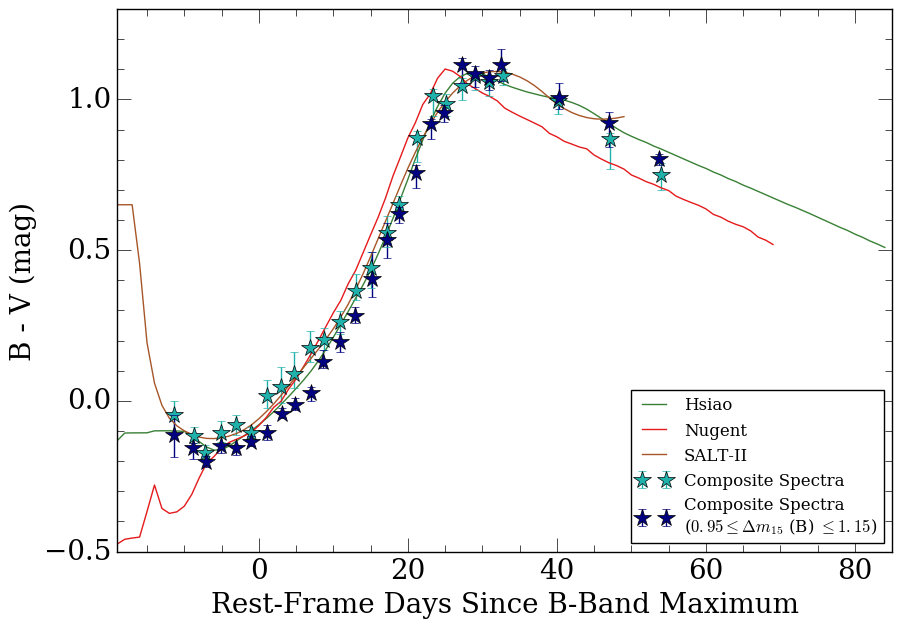

In [242]:
color_dict = {"Comp": "#000080", "Hsiao": "#398036", "Nugent": "#E41A1C", "SALT-II": "#A65628"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao')
# plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'bo', markersize=2, label = 'hsiao')
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent')
# plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'ro', markersize=2, label = 'nugent')
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT-II')
# plt.plot(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), '*', markersize=13, color = 'y')
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='*', markersize=13, color = "#20b2aa", label = 'Composite Spectra')
# plt.plot(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), '*', markersize=13, color = 'yellow')
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($0.95 \leq \Delta m_{15}$ (B) $\leq 1.15$)')
plt.xlim([-19,85])
plt.ylim([-.5,1.3])
plt.legend(loc=4)
plt.savefig('../../../Paper_Drafts/template_comparisons/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

## Spectral feature comparison at various epochs

1.13533055714
1.10606231452


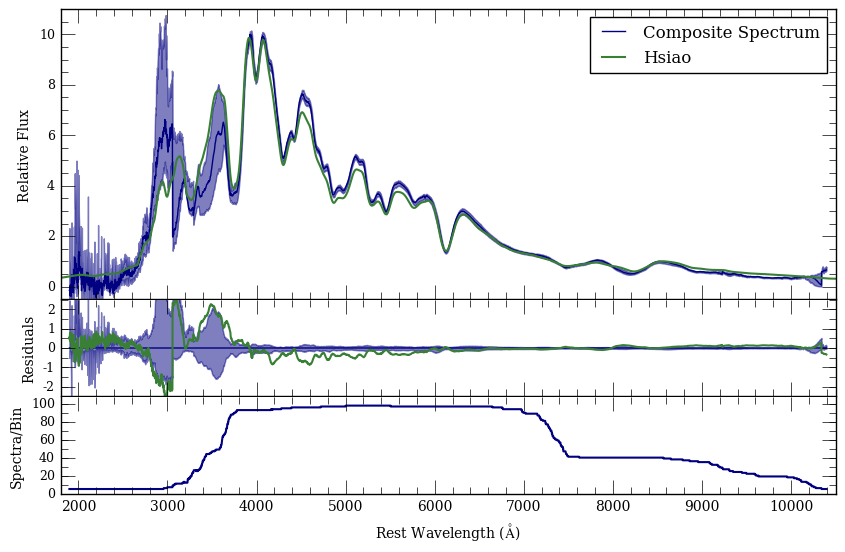

In [332]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT-II"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

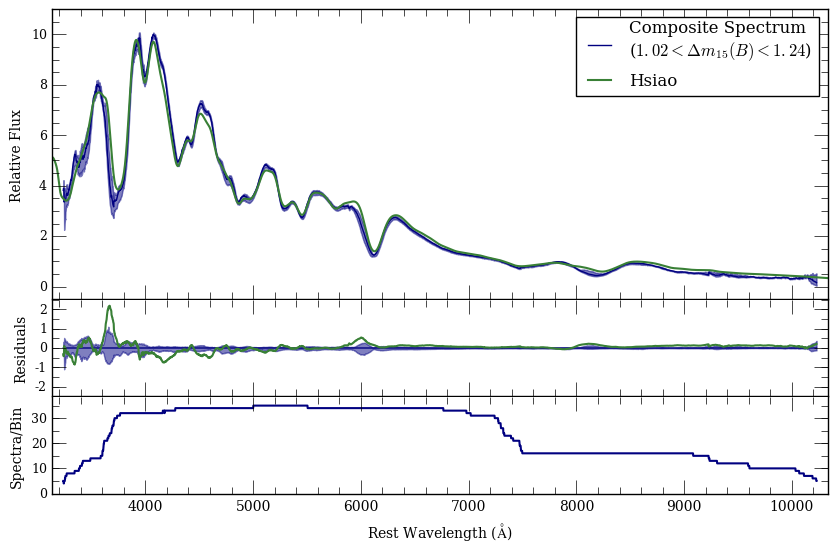

In [333]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

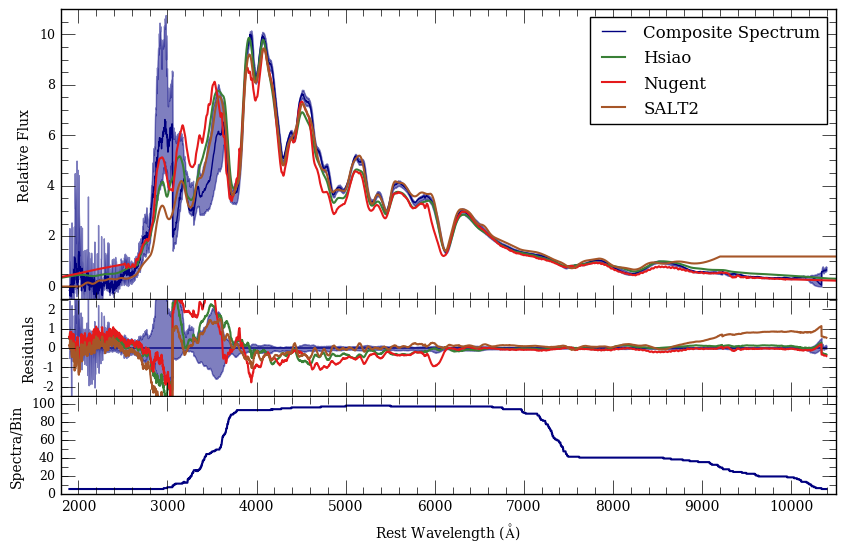

In [334]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_max_light_all')

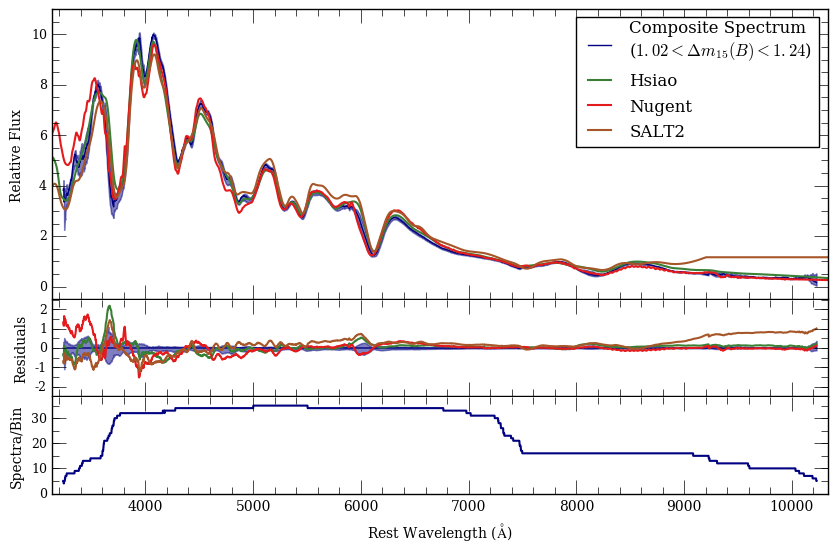

In [335]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, savename = 'max_light_temp_comparison_dm15')
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_max_light_dm15')

In [84]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [85]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [86]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [87]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [88]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [89]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [90]:
query_1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1. and dm15_source < 1.2) or (dm15_from_fits >= 1. and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'"]

In [91]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8
159 questionable files currently ignored
16 questionable spectra removed 185 spectra left
3 Peculiar Ias removed 182 spectra left
146 spectra with host corrections
159 questionable files currently ignored
103 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
1990n sn1990n-19900717-oi.flm 70.7641563691 None 0.88901820492 7.33808719397 0.003395 bsnip 3958.0 9790.0 13.0
Host correction...
1991t sn1991t-19910505.flm 83.1866164841 None 0.831468991816 7.23907849643 0.005791 bsnip 3144.0 9752.0 13.0
Host correction...
1997bp sn1997bp-19970416-uoi.flm 45.3984985531 1.08 None 6.22327216179 0.008312 bsnip 3184.0 10334.0 None
Host correction...
1998v sn1998v-19980326-br.flm 83.5622224849 0.99 None 7.39102149597 0.017586 bsnip 3834.0 8992.0 12.0
Host correction...
1999cl sn1999cl-19990621-ir-corrected.flm 4.1220867414 1.17 None 7.80362223839 0.007609 bsnip 

1.1356922167
1.10102596666


query_db.py:541: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  composites = []
query_db.py:542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sn_arrays = []


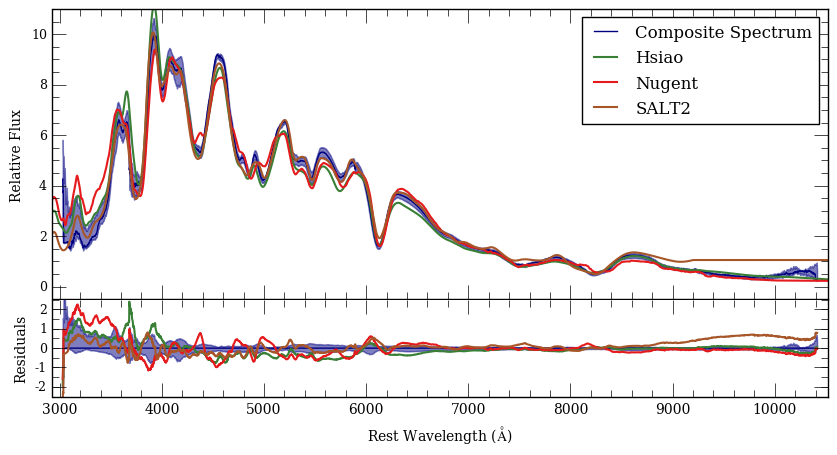

In [320]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_1week)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT-II"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_p7_all')

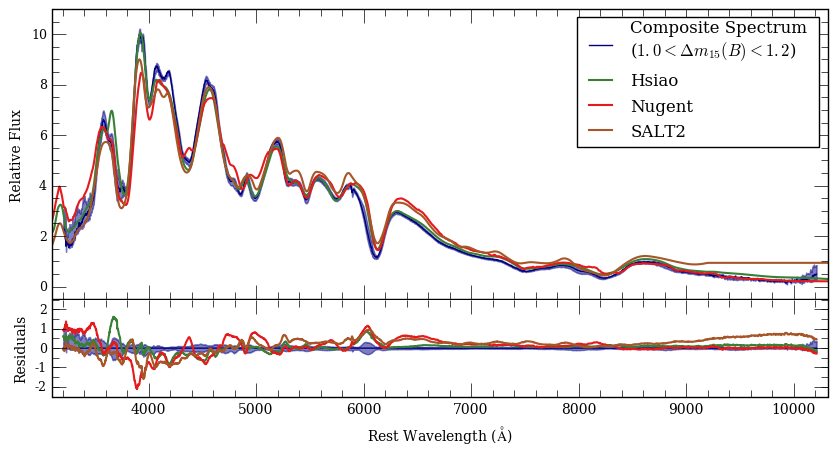

In [321]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_p7_dm15')

In [108]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [109]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [110]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [111]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [112]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [113]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [215]:
query_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= .98 and dm15_source < 1.18) or (dm15_from_fits >= .98 and dm15_from_fits < 1.18)) and Supernovae.SN !='2002bf'"]

In [216]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6
159 questionable files currently ignored
6 questionable spectra removed 151 spectra left
2 Peculiar Ias removed 149 spectra left
108 spectra with host corrections
159 questionable files currently ignored
67 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
1994d sn1994d-19940313.flm 123.405435199 1.37 None -7.92568893218 0.002058 bsnip 3284.0 8732.0 8.0
Host correction...
1998dk sn1998dk-19980824-90-br.flm 28.9891747848 1.05 None -7.42682480293 0.013219 bsnip 3308.0 9920.0 14.0
Host correction...
1999dk sn1999dk-19990817-ui.flm 55.0112411584 None 0.893643877201 -6.86135414204 0.01496 bsnip 3342.0 10346.0 14.0
Host correction...
2001eh sn2001eh-20010911-ui.flm 17.5454059317 0.92 None -6.28907771765 0.037036 bsnip 3234.0 9980.0 12.0
Host correction...
2002cr sn2002cr-20020507-ui-corrected.flm 49.5899013369 1.19 None -6.96299159457 0.009479891585

dm15:
1.11996436024
1.09004100121
phase:
-7.26664495093
-7.14531153803


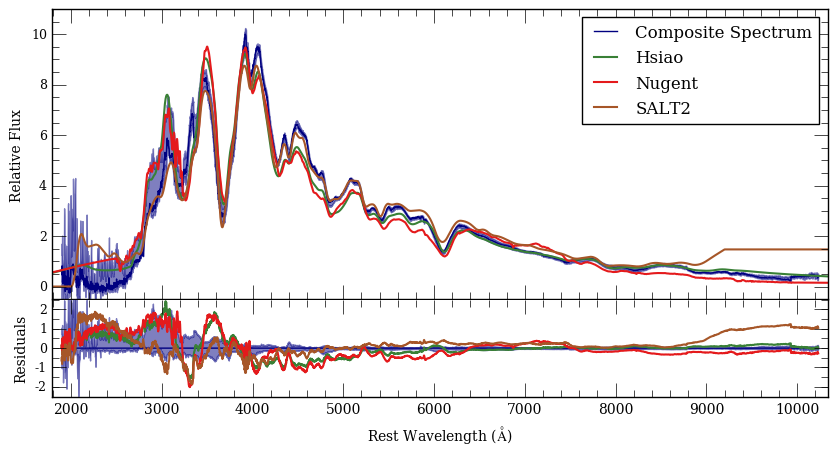

In [331]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_m1week)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT-II"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_m7_all')

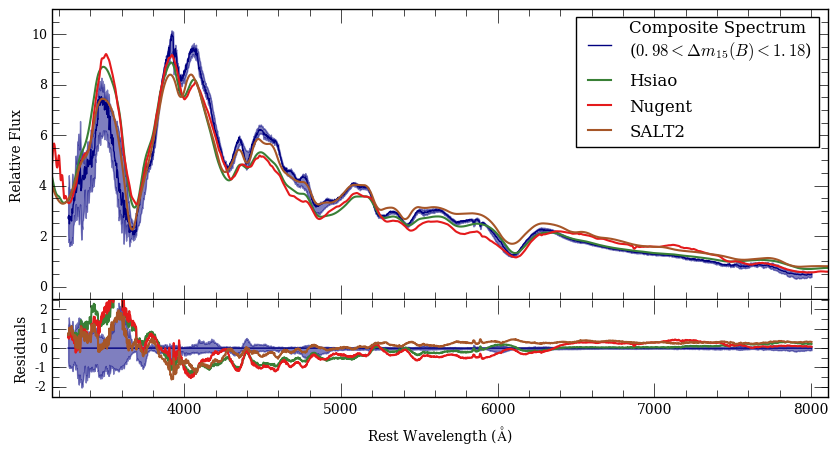

In [330]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_m7_dm15')

In [119]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [120]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [121]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [122]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [123]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [124]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [223]:
query_1month = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.0 and dm15_source < 1.2) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.2)) and Supernovae.SN !='2002bf'"]

In [224]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
159 questionable files currently ignored
3 questionable spectra removed 161 spectra left
4 Peculiar Ias removed 157 spectra left
136 spectra with host corrections
159 questionable files currently ignored
94 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
1991m sn1991m-19910419-final.flm 55.1191897898 None 1.22016841445 29.715011889 0.007235 bsnip 3922.0 6900.0 14.0
Host correction...
1991s sn1991s-19910505-final.flm 0.01639535 None 0.997715648132 31.8629659169 0.054453 bsnip 3750.0 6590.0 19.0
Host correction...
1993ac sn1993ac-19931108-ui.flm 4.28132103463 1.19 None 28.4747378456 0.049 bsnip 3120.0 9484.0 None
Host correction...
1994d sn1994d-19940420.flm 44.924309615 1.37 None 29.3535903111 0.002058 bsnip 3254.0 10130.0 8.0
Host correction...
1998bu sn1998bu-19980618-ui.flm 64.1344102033 1.03 None 29

dm15:
1.1226882027
1.08456197933
phase:
29.6904209916
29.6351628315


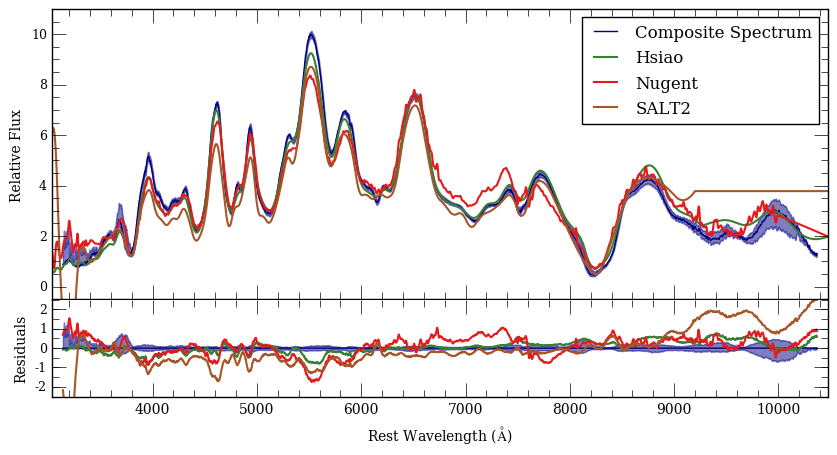

In [336]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT-II"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_p30_all')

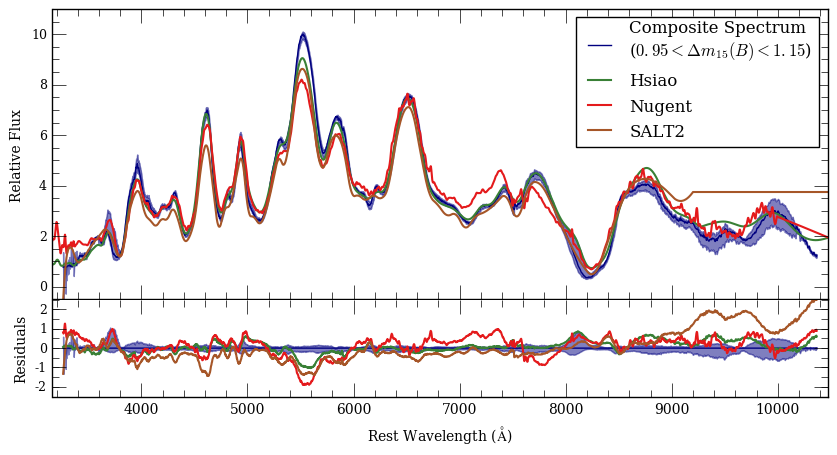

In [337]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"], savename = 'template_comparisons/temp_p30_dm15')

## 91t and 91bg nugent maximum light comparisons

In [150]:
query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [151]:
composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'
159 questionable files currently ignored
0 questionable spectra removed 23 spectra left
0 Peculiar Ias removed 23 spectra left
23 spectra with host corrections
159 questionable files currently ignored
15 valid SNe found
Arrays cleaned
15 spectra may have telluric contamination
1998es sn1998es-19981125-ui-corrected.flm 69.1436677309 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
Host correction...
2001cp sn2001cp-20010629-ui.flm 24.0178237234 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
Host correction...
2005eq sn2005eq-20051011.376-ui-corrected.flm 37.8569772533 0.88 None 0.0310988486616 0.028977 bsnip 3278.0 10156.0 15.0
Host correct

In [184]:
query_db.set_min_num_spec(composites_91t, 5)

0.841709141721
[-0.4, -0.30000000000000004, -0.2, -0.09999999999999998, 0.0, 0.09999999999999998, 0.20000000000000007, 0.30000000000000004, 0.4, 0.5]


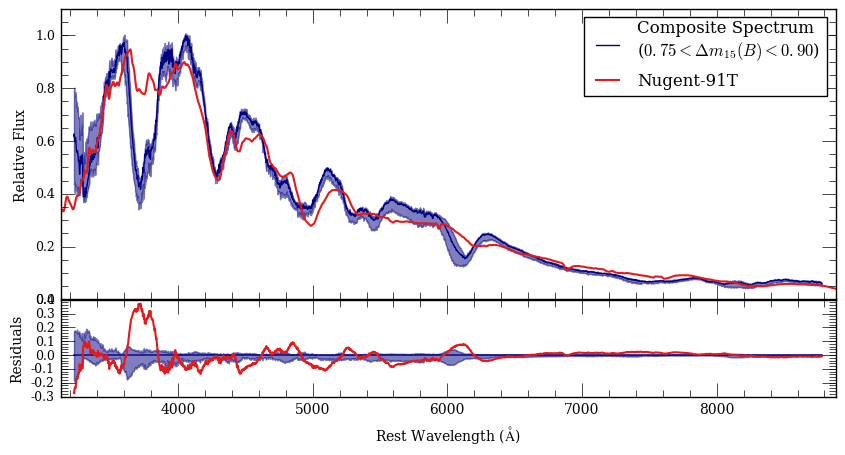

In [185]:
comps_and_temps = []
for comp in composites_91t:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91t)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [157]:
query_91bg = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'"]

In [158]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'
159 questionable files currently ignored
4 questionable spectra removed 32 spectra left
1 Peculiar Ias removed 31 spectra left
26 spectra with host corrections
159 questionable files currently ignored
11 valid SNe found
Arrays cleaned
11 spectra may have telluric contamination
1991bg sn1991bg-19911214-noz.flm 55.4333249814 None 1.88326464208 1.67830718204 0.003392 bsnip 3942.0 9818.0 3.0
Host correction...
1999da sn1999da-19990709-ui.flm 35.441805608 1.9 None -2.69083978888 0.012695 bsnip 3300.0 10368.0 1.0
Host correction...
2006cs sn2006cs-20060605.335-ui.flm 11.9352989284 None 2.00347119949 1.81209679625 0.023676 bsnip 3284.0 10306.0 8.0
Host correction...
2007n sn2007n-20070122.583-deimos.flm 46.123607582 None 1.98748908247 0.636798726689 0.0128789097156 bsnip 4442.0 9398.0 None

1.93252336003


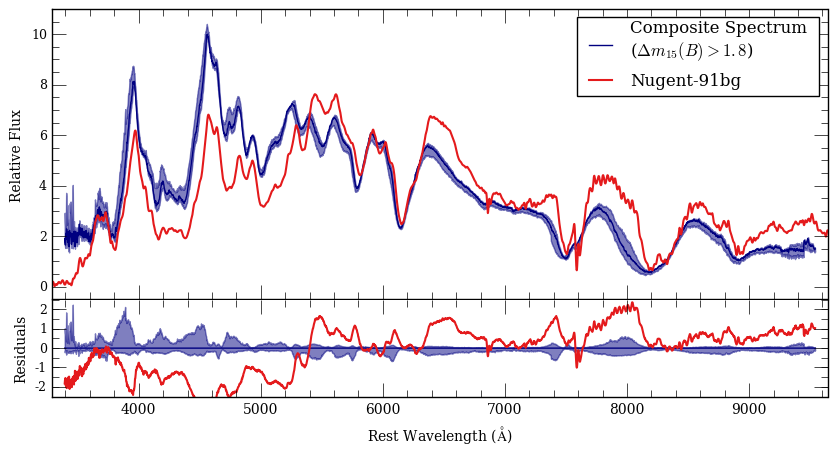

In [338]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], savename = 'template_comparisons/temp_max_light_91bg')